In [1]:
# Disable notebook scolling

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# Function to plots an image

def plotImage( title1, img1, savename=''):
    plt.figure(figsize=(15,5))
    
    plt.title( title1, fontsize=20)
    plt.plot(img1)

    if savename != '':        
        path = 'output_images/'+savename
        plt.savefig( path )
        print('Saved image to: ', path)
    
    plt.show()

In [4]:
# Function plots 2 images side by side

def plot2images( title1, img1, title2, img2, savename=''):
    plt.figure(figsize=(15,5))

    # subplot(nrows, ncols, plot_number)    
    plt.subplot(1, 2, 1)
    plt.title( title1, fontsize=20)
    plt.imshow(img1)

    plt.subplot(1, 2, 2)
    plt.title( title2,  fontsize=20)
    plt.imshow(img2)

    if savename != '':        
        path = 'output_images/'+savename
        plt.savefig( path )
        print('Saved image to: ', path)
    
    plt.show()

6941 8968
Saved image to:  output_images/datasamples.jpg


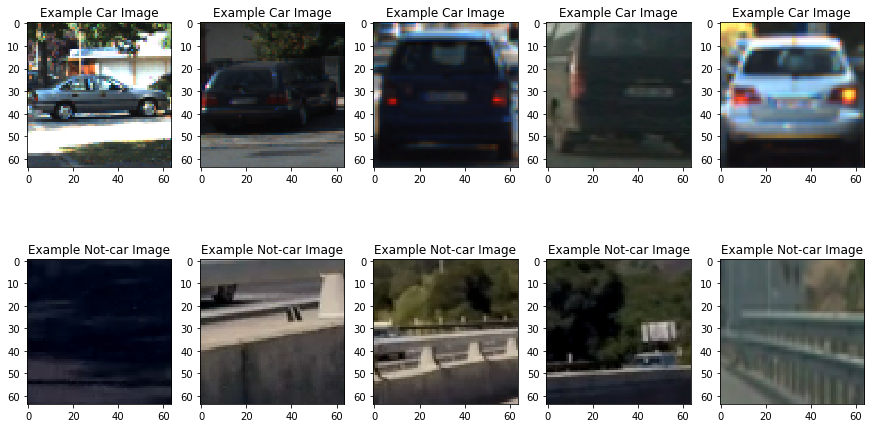

In [5]:
# Course Lesson 19 - Data Exploration

from collections import deque
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
import os
from scipy.ndimage.measurements import label
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from tqdm import tqdm

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
# NOTE: the next import is only valid 
# for scikit-learn version <= 0.17
# if you are using scikit-learn >= 0.18 then use this:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

cars = []
notcars = []

cars = glob.glob('datasets/vehicles/*.png')
notcars = glob.glob('datasets/non-vehicles/*.png')    
                          
print(len(cars), len(notcars))

n = 5    
# subplot(nrows, ncols, plot_number)    
plt.figure(figsize=(15,8))
c=0
for i in range(1,n+1):   
    car_ind = np.random.randint(0, len(cars))
    car_image = mpimg.imread(cars[car_ind])    
    # Plot the examples
    c+=1
    plt.subplot(2,n,c)
    plt.imshow(car_image)        
    plt.title('Example Car Image')

for i in range(1,n+1):   
    c+=1
    notcar_ind = np.random.randint(0, len(notcars))
    notcar_image = mpimg.imread(notcars[notcar_ind])
    plt.subplot(2,n,c)
    plt.imshow(notcar_image)
    plt.title('Example Not-car Image')

path = 'output_images/datasamples.jpg'
plt.savefig( path )
print('Saved image to: ', path)
plt.show()    


Saved image to:  output_images/hogsample.jpg


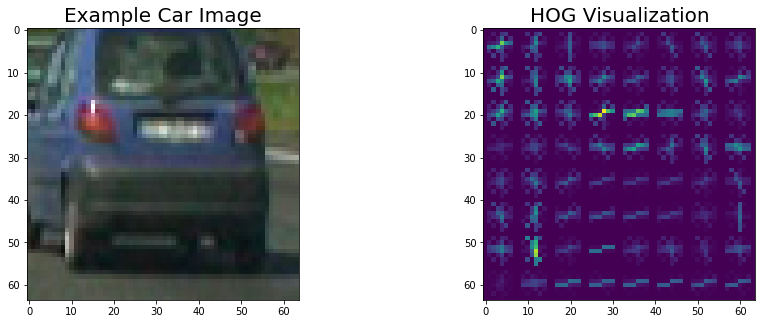

Saved image to:  output_images/hhog_features.jpg


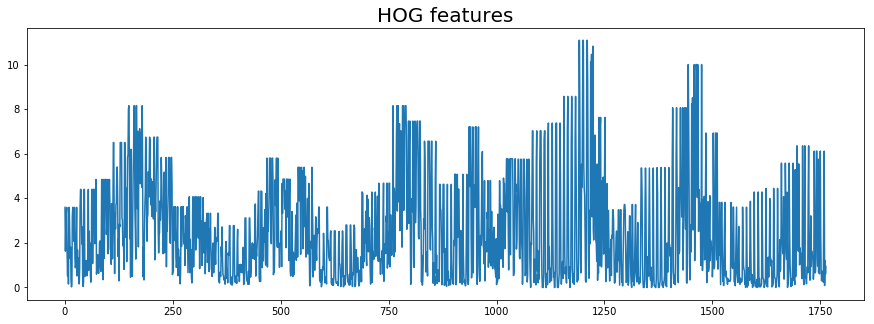

In [6]:
# lesson 22 scikit-image HOG

from skimage.feature import hog
        
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                                  visualise=True, feature_vector=feature_vec, block_norm='L2-Hys') # L1
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                       visualise=False, feature_vector=feature_vec, block_norm='L2-Hys') # L1
        return features

# Generate a random index to look at a car image
ind = np.random.randint(0, len(cars))
# Read in the image
image = mpimg.imread(cars[ind])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2
# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=True)


plot2images('Example Car Image', image, 'HOG Visualization', hog_image, 'hogsample.jpg')
plotImage('HOG features', features, 'hhog_features.jpg')


Saved image to:  output_images/spatially_binned_features.jpg


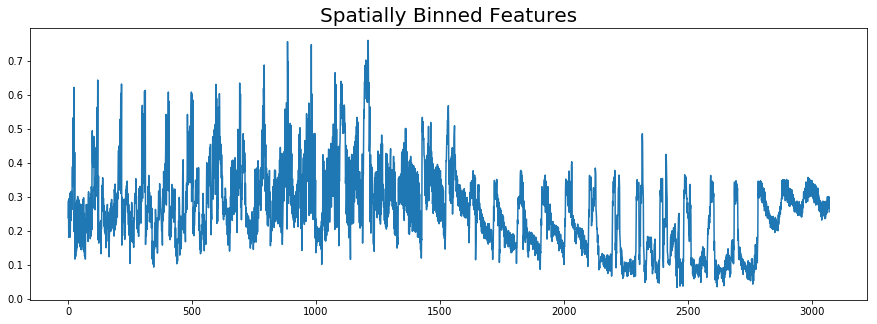

In [7]:
## lessonn 16 - Spatial binning of color

# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    feature_image = np.copy(img)             
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(feature_image, size).ravel() 
    # Return the feature vector
    return features

# spattial binned demo
# @todo

feature_vec = bin_spatial(image, size=(32, 32))

plotImage('Spatially Binned Features', feature_vec, 'spatially_binned_features.jpg')
    


datasets/vehicles\4714.png


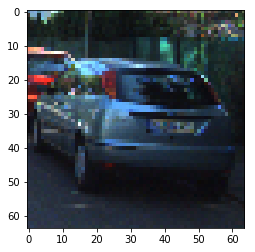

(96,)
Saved image to:  output_images/colour_histogram_features.jpg


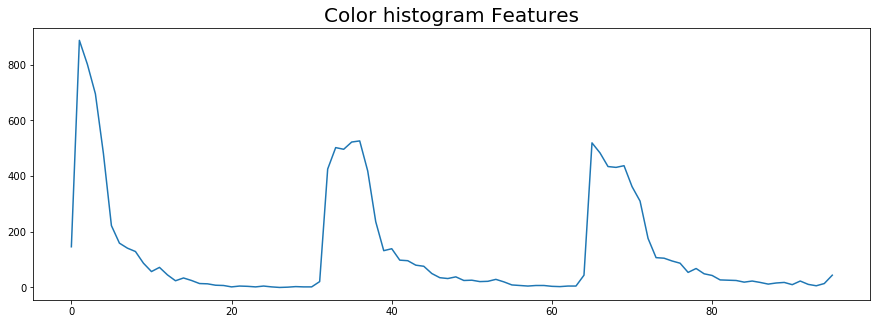

In [8]:
# Lesson 12 histogram of colors

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features


ind = np.random.randint(0, len(cars))
# Read in the image
print(cars[ind])
image = mpimg.imread(cars[ind])
plt.imshow(image)
plt.show()

feature_vec = color_hist(image, nbins=32)
print(feature_vec.shape)

plotImage('Color histogram Features', feature_vec, 'colour_histogram_features.jpg')
    

In [9]:
def load_image(path):
    
    img = mpimg.imread(path) # for .png
    # If the image is of type .jpg or .jpeg divide by 255
    if img.mean() > 2:
        img = img/255
    
    return img

In [10]:
# lesson 22 - Combine and Normalize Features

def extract_features(file, color_space='RGB', spatial_size=(32, 32),
                     hist_bins=32, orient=9,
                     pix_per_cell=8, cell_per_block=2, hog_channel=0,
                     spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    file_features = []
    
    # Read in image
    image = load_image(file)

    # apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
    else:
        feature_image = np.copy(image)
        
    # extract spatial features
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        file_features.append(spatial_features)
    
    # extract histogram features
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        file_features.append(hist_features)
    
    # extract hog features
    if hog_feat == True:
        if hog_channel == "ALL":
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_hog_features(feature_image[:, :, channel],
                                                     orient, pix_per_cell, cell_per_block,
                                                     vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)
        else:
            hog_features = get_hog_features(feature_image[:, :, hog_channel], orient,
                                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        # Append the new feature vector to the features list
        file_features.append(hog_features)
        
    # Return feature vector
    return np.concatenate(file_features)
        

datasets/vehicles\1007.png
Saved image to:  output_images/extract_features_raw.jpg


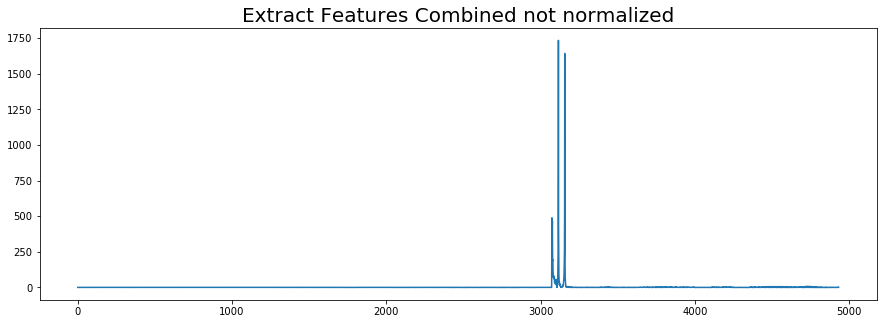

In [11]:
# Feature extraction parameters
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = 0 # Can be 0, 1, 2, or "ALL"
spatial_size=(32,32)
hist_bins=32

sample = cars[9]

print(sample)
features = extract_features(sample, color_space=color_space, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_size=spatial_size, hist_bins=hist_bins)


plotImage('Extract Features Combined not normalized', features, 'extract_features_raw.jpg')
    

In [12]:
# Loop over a given dataset with pathes to imagefiles

def extract_features_from_dataset(files, color_space='RGB', spatial_size=(32, 32),
                     hist_bins=32, orient=9,
                     pix_per_cell=8, cell_per_block=2, hog_channel=0):
    
    # Create a list to append feature vectors to
    features = []
    
    # Iterate through the list of images
    for file in tqdm(files):  # tqdm is the progress indicator
        #print(file)
        file_features = extract_features(file, color_space=color_space, spatial_size=spatial_size, hist_bins=hist_bins,
                                orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                                hog_channel=hog_channel )
    
        features.append(file_features)
        
    # Return a list of feature vectors
    return features


In [13]:
# Function to create test- and training datasets and normalize the features
def create_traindataset(car_features, notcar_features):
    
    X = np.vstack((car_features, notcar_features)).astype(np.float64)
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)

    # Define the labels vector
    y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

    # Split up data into randomized training and test sets
    rand_state = np.random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=rand_state)
    print('Train and test feature set generated. Shape of train set:', X_train.shape)
    
    return X_scaler, X_train, X_test, y_train, y_test


In [14]:

def fit_PCA(X_train, X_test, y_train, y_test, n_components=150):

    # Extracting the top (n_components) eigenfeatures
    pca = PCA(svd_solver='randomized', n_components=n_components, whiten=True).fit(X_train)

    #Projecting the input data on the eigenfaces orthonormal basis
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    #print("Variance of the PCs: ", pca.explained_variance_ratio_)
    
    print('PCA Train features generated. Shape of PCA train set: ', X_train_pca.shape)
    return pca, X_train_pca, X_test_pca


In [15]:

# lesson 29 HOG Classify    
    
########### TRAIN CLASSIFIER ###########

def fit_SVC(X_train, X_test, y_train, y_test):
        
    print('Feature vector length:', len(X_train[0]))
    # Use a linear SVC 
    svc = LinearSVC()
    # Check the training time for the SVC
    t = time.time() 
    # Fit
    svc.fit(X_train, y_train)
    # Stop end time
    t2 = time.time()
    # Calculate time
    time_fit = round(t2 - t, 5)
    
    print(round(t2-t, 2), 'Seconds to train linear SVC...')
    
    # Check the score of the SVC
    accuracy = round(svc.score(X_test, y_test), 4)
    print('Test Accuracy of SVC = ',accuracy )
    
    # Check the prediction time for a single sample
    t = time.time()
    n_predict = 10
    print('SVC linear predicts:   ', svc.predict(X_test[0:n_predict]))
    print('For these ',n_predict, ' labels: ', y_test[0:n_predict])
    t2 = time.time()  
    time_prediction = round(t2 - t, 5)
    print(time_prediction, 'Seconds to predict', n_predict,'labels with SVC')
        
    return svc, accuracy, time_fit, time_prediction    


### Train a classifier

In [16]:
# Cell loads data set, extracts features and fits classifier
# for later use in video processing pipeline

from sklearn.externals import joblib

# Changes here have to be made in process_pipeline as well

color_space    = 'YCrCb'    # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient         = 9          # HOG orientations
pix_per_cell   = 8          # HOG pixel per cell
cell_per_block = 2          # HOG cells per block
hog_channel    = 0          # 0, 1, 2, or "ALL"
spatial_size   = (32, 32)   # Spatial binning dimensions
hist_bins      = 32         # Number of histogram bins


# Load saved classifier
if os.path.exists('SVCPCA.pkl'):
    svc, X_scaler, pca  = joblib.load('SVC.pkl')
    print(svc)    
    print(pca)    
    print('Loaded SVC Classifier and X_scale')

# extract features, normalize, fit with SVC Linear
else:
    car_features = extract_features_from_dataset(cars, color_space=color_space,
                                    spatial_size=spatial_size, hist_bins=hist_bins,
                                    orient=orient, pix_per_cell=pix_per_cell,
                                    cell_per_block=cell_per_block,
                                    hog_channel=hog_channel)                                
    notcar_features = extract_features_from_dataset(notcars, color_space=color_space,
                                       spatial_size=spatial_size, hist_bins=hist_bins,
                                       orient=orient, pix_per_cell=pix_per_cell,
                                       cell_per_block=cell_per_block,
                                       hog_channel=hog_channel)
    
    X_scaler, X_train, X_test, y_train, y_test = create_traindataset(car_features, notcar_features)
    
    
    pca, X_train_pca, X_test_pca = fit_PCA(X_train, X_test, y_train, y_test, n_components=150)
    svc, accuracy, time_fit, time_prediction = fit_SVC(X_train_pca, X_test_pca, y_train, y_test)
    #svc, accuracy, time_fit, time_prediction = fit_SVC(X_train, X_test, y_train, y_test)
    
    joblib.dump((svc, X_scaler, pca), 'SVCPCA.pkl')
    print('Saved Parameters.')
        
    print('Accuracy:',accuracy)
    print('Time to fit:', time_fit,'seconds. Time to predict 100 samples: ',time_prediction,'seconds.')
        
    plotImage('Extract features, combined and normalized', X_train[9],'extract_features_normalized.jpg')
    

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=True)
Loaded SVC Classifier and X_scale


In [17]:
# Lesson 35: Hog Sub-sampling Window Search 

def find_cars(img, ystart, ystop, scale, svc, pca, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    bbox_list = []
    
    img = img.astype(np.float32) # for png
    # img = img.astype(np.float32)/255  for jpg
    
    # crop image to relevant road
    img_tosearch = img[ystart:ystop, :, :]
    
    # Convert to chosen colorspace
    ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2YCrCb)

    # scale single picture hog to new size
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1] / scale), np.int(imshape[0] / scale)))

    ch1 = ctrans_tosearch[:, :, 0]
    ch2 = ctrans_tosearch[:, :, 1]
    ch3 = ctrans_tosearch[:, :, 2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1
    nfeat_per_block = orient * cell_per_block ** 2

    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step

    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)

    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb * cells_per_step
            xpos = xb * cells_per_step
            
            xleft = xpos * pix_per_cell
            ytop = ypos * pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop + window, xleft:xleft + window], (64, 64))

            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)
            

            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos + nblocks_per_window, xpos:xpos + nblocks_per_window].ravel()
            #hog_feat2 = hog2[ypos:ypos + nblocks_per_window, xpos:xpos + nblocks_per_window].ravel()
            #hog_feat3 = hog3[ypos:ypos + nblocks_per_window, xpos:xpos + nblocks_per_window].ravel()
            #hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))
            hog_features = np.copy(hog_feat1)
            
            test = np.hstack((spatial_features, hist_features, hog_features))
            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))            
            #test_prediction = svc.predict(test_features)
            test_features_pca = pca.transform(test_features)
            test_prediction = svc.predict(test_features_pca)            

            if test_prediction == 1:
                xbox_left = np.int(xleft * scale)
                ytop_draw = np.int(ytop * scale)
                win_draw = np.int(window * scale)
                bbox_list.append([(xbox_left, ytop_draw + ystart),(xbox_left + win_draw, ytop_draw + win_draw + ystart)])

    return bbox_list



In [18]:
# Define a function that takes an image, a list of bounding boxes, 
# and optional color tuple and line thickness as inputs
# then draws boxes in that color on the output

def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # make a copy of the image
    draw_img = np.copy(img)*255
    # draw each bounding box on your image copy using cv2.rectangle()
    # return the image copy with boxes drawn
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(draw_img, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return draw_img/255


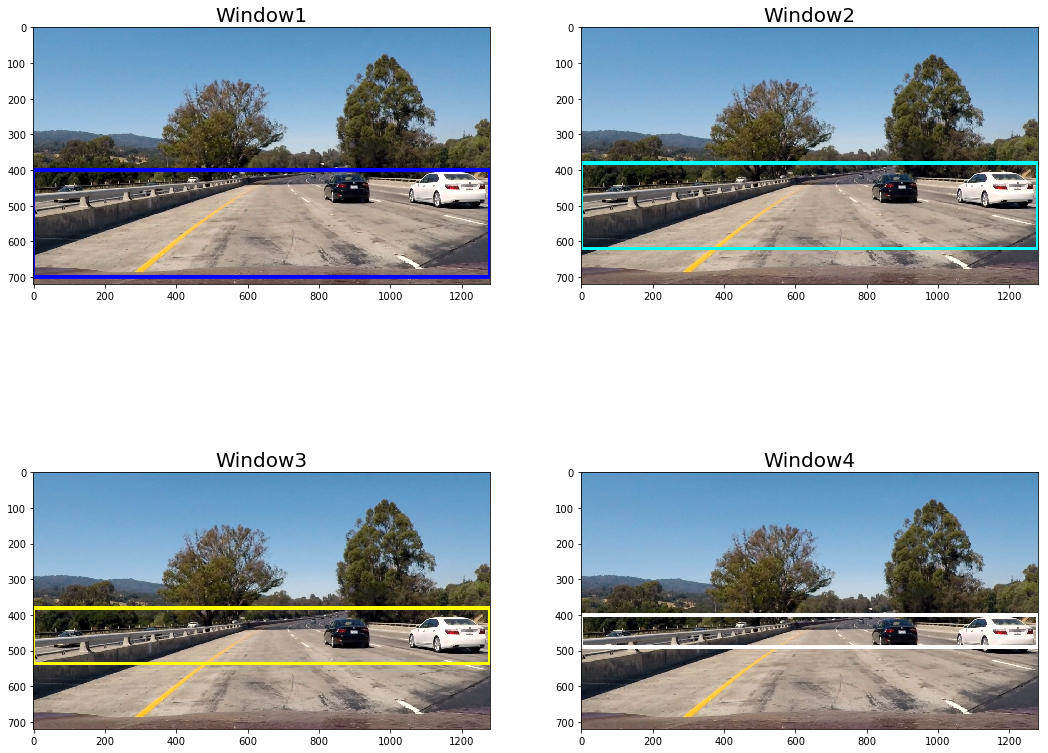

In [19]:
img = mpimg.imread('test_images/test1.jpg')
img = img/255 # for jpegs

boxes = [  [400,700, 1.0], # near                   
           [380,620, 1.5],                                      
           [380,536, 2.0],                                      
           [400,490, 4.0] # far        
         ]  

plt.figure(figsize=(18,15))

# subplot(nrows, ncols, plot_number)    


box = [ [(0, 400), (1280, 700)]  ]
imgbox = draw_boxes(img, box, color=(0,0,255), thick=10)
#plotImage(imgbox,'Window1','window1')
plt.subplot(2, 2, 1)
plt.title( 'Window1', fontsize=20)
plt.imshow(imgbox)


box = [ [(0, 380), (1280, 620)] ]
imgbox = draw_boxes(img, box, color=(0,255,255), thick=10)
plt.subplot(2, 2, 2)
plt.title( 'Window2', fontsize=20)
plt.imshow(imgbox)


box = [ [(0, 380), (1280, 536)] ]
imgbox = draw_boxes(img, box, color=(255,255,0), thick=10)
plt.subplot(2, 2, 3)
plt.title( 'Window3', fontsize=20)
plt.imshow(imgbox)


box = [ [(0, 400), (1280, 490)] ]
imgbox = draw_boxes(img, box, color=(255,255,255), thick=10)
plt.subplot(2, 2, 4)
plt.title( 'Window4', fontsize=20)
plt.imshow(imgbox)

path = 'output_images/searchwindows.jpg'
plt.savefig( path )
plt.show()


### Heatmap 
Used to prevent false positives


In [20]:
# lesson 37

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap


def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap


In [21]:
# Lesson 37 Multiple Detections & False Positives

def draw_labeled_bboxes(img, labels):
    img = img * 255 # jpeg
    # Iterate through all detected cars
    rectangles = []
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        
        ymin = np.min(nonzeroy)
        ymax = np.max(nonzeroy)
        xmin = np.min(nonzerox)
        xmax = np.max(nonzerox)
        
        # Define a bounding box based on min/max x and y
        bbox = ((xmin, ymin), (xmax, ymax))
        rectangles.append(bbox)
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (255,255,0), 6)
                  
        font = cv2.FONT_HERSHEY_SIMPLEX
        text = 'Car ' + str(car_number)
        cv2.putText(img,text, (xmin,ymin-12), font, 1, (255,255,0), 2)
        
    # Return the image and rectangles
    return img/255, rectangles


In [22]:
def process_pipeline(img, svc, pca, X_scaler, version='2', heat_threshold=10):

    rectangles = []
    
    # Changes here have to be made when training the classifier as well

    color_space    = 'YCrCb'    # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
    orient         = 9          # HOG orientations
    pix_per_cell   = 8          # HOG pixel per cell
    cell_per_block = 2          # HOG cells per block
    hog_channel    = 0          # 0, 1, 2, or "ALL"
    spatial_size   = (32, 32)   # Spatial binning dimensions
    hist_bins      = 32         # Number of histogram bins

    #img = img.astype(np.float32)/255
        
    parameters = [ [400,700, 1.0],                   
                   [380,620, 1.5],                                      
                   [380,536, 2.0],                                      
                   [400,490, 4.0]         
                 ]                     
    
    for param in parameters:                
        ystart = param[0]
        ystop  = param[1]
        scale  = param[2]    

        rectangles.append(find_cars(img, ystart, ystop, scale, svc, pca, X_scaler, 
                               orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))
              
    rectangles = [item for sublist in rectangles for item in sublist]     
    
    heatmap_img = np.zeros_like(img[:,:,0])
    
    if version == '1':
        heatmap_img = add_heat(heatmap_img, rectangles)
        heatmap_img = apply_threshold(heatmap_img, heat_threshold)
    else:
        # add heatmap to the history        
        heatmap_img = add_heat(heatmap_img, rectangles)        
        history.append(heatmap_img)
        
        heatmap_img = np.zeros_like(img[:,:,0])
        hcounter=0
        for heatmap_item in history:
            heatmap_img += heatmap_item
            hcounter+=1
        
        if hcounter > 0:
            heatmap_img = heatmap_img//hcounter                        
        
        heatmap_img = apply_threshold(heatmap_img, heat_threshold )
        
    labels = label(heatmap_img)
    
    draw_img, rects = draw_labeled_bboxes(np.copy(img), labels)
    
    return draw_img


## Testing the pipeline step by step

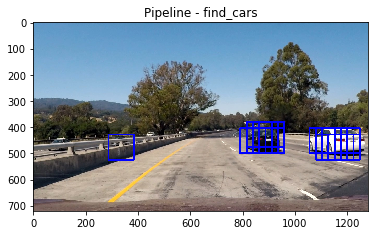

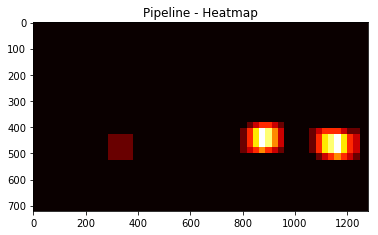

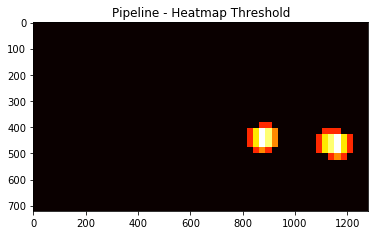

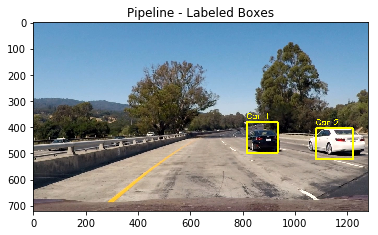

In [23]:
# Pipeline Test
# Define paramters

color_space = 'YCrCb'  # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9             # HOG orientations
pix_per_cell = 8       # HOG pixel per cell
cell_per_block = 2     # HOG cells per block
spatial_size = (32, 32)# Spatial binning dimensions
hist_bins = 32         # Number of histogram bins

# read test image
img = mpimg.imread('test_images/test1.jpg')
img = img/255 # for jpegs
    
rectangles = find_cars(img, 380, 620, 1.5, svc, pca, X_scaler, 
                               orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
# Step 1 - find cars
boximg = draw_boxes(img, rectangles)
plt.imshow(boximg)
plt.title('Pipeline - find_cars')
plt.savefig( 'output_images/pipeline_findcars.jpg' )
plt.show()

heatmap_img = np.zeros_like(img[:,:,0])
heatmap_img = add_heat(heatmap_img, rectangles)
plt.imshow(heatmap_img, cmap='hot')
plt.title('Pipeline - Heatmap')
plt.savefig( 'output_images/pipeline_heatmap.jpg' )
plt.show()

heatmap_img = apply_threshold(heatmap_img, 2)
plt.imshow(heatmap_img,cmap='hot')
plt.title('Pipeline - Heatmap Threshold')
plt.savefig( 'output_images/pipeline_heatmap_threshold.jpg' )
plt.show()


labels = label(heatmap_img)
draw_img, rects = draw_labeled_bboxes(np.copy(img), labels)
plt.imshow(draw_img)
plt.title('Pipeline - Labeled Boxes')
plt.savefig( 'output_images/pipeline_labeled_boxes.jpg' )
plt.show()


In [24]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output
    
    image = image/255 # for jpegs        
    processed = process_pipeline( image, svc, pca, X_scaler, version='2', heat_threshold=4) * 255    
    
    return processed

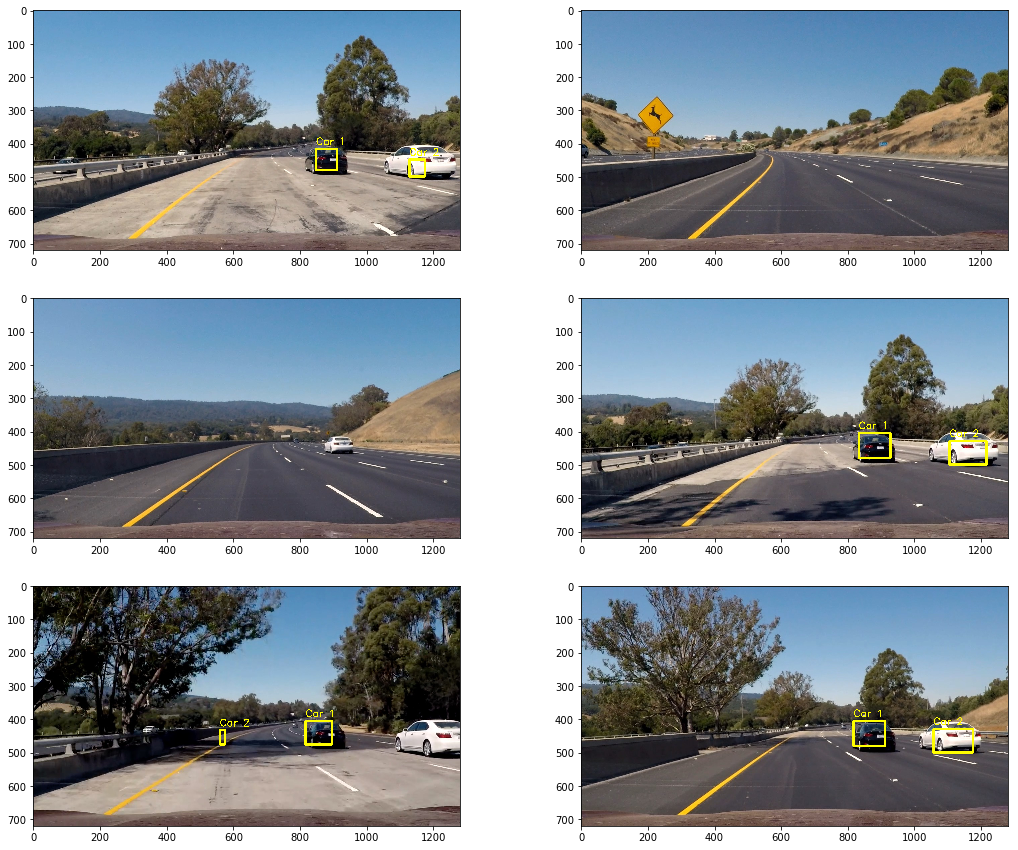

In [31]:
#process Test Images
def process_testimage(image):
    image = image/255 # for jpegs
    processed = process_pipeline( image, svc, pca, X_scaler, version='1', heat_threshold=10) * 255   
    return processed

testimages = glob.glob('test_images/*.jpg')
plt.figure(figsize=(18,15))
n=1
for img in testimages:
    img = mpimg.imread(img)    
    plt.subplot(3,2,n)
    plt.imshow( process_testimage(img)/255 )
    n+=1
plt.savefig( 'output_images/processed_testimages.jpg' )
plt.show()    

In [27]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip

history = deque(maxlen = 10)
version = "2" # 1 = standard, 2 = smoothed
clip = 'project_video'

videoclip = VideoFileClip( clip + ".mp4")#.subclip(20,40)
#videoclip.fps = 3
project_output = clip + '_output_V' + version + '.mp4'
project_clip = videoclip.fl_image(process_image) #NOTE: this function expects color images!!
%time project_clip.write_videofile(project_output, audio=False)
videoclip.reader.close()
videoclip.audio.reader.close_proc() 


[MoviePy] >>>> Building video project_video_output_V2.mp4
[MoviePy] Writing video project_video_output_V2.mp4



  8%|██▉                                  | 101/1261 [06:31<1:10:56,  3.67s/it]


 16%|█████▉                               | 203/1261 [12:59<1:10:00,  3.97s/it]


 24%|█████████▍                             | 305/1261 [19:15<59:22,  3.73s/it]


 32%|████████████▌                          | 407/1261 [25:43<51:45,  3.64s/it]


 40%|███████████████▋                       | 509/1261 [32:05<46:13,  3.69s/it]


 48%|██████████████████▉                    | 611/1261 [38:20<39:38,  3.66s/it]


 57%|██████████████████████                 | 713/1261 [44:43<32:51,  3.60s/it]


 65%|█████████████████████████▏             | 815/1261 [51:10<27:39,  3.72s/it]


 73%|████████████████████████████▎          | 917/1261 [57:22<20:43,  3.61s/it]


 81%|█████████████████████████████       | 1019/1261 [1:03:44<14:38,  3.63s/it]


 89%|████████████████████████████████    | 1121/1261 [1:10:01<09:17,  3.98s/it]


 97%|██████████████████████████████████▉ | 1223/1261 [1:16:19<02:16,  3.60s/it]


100%|███████████████████████████████████▉| 1260/1261 [1:18:34<00:03,  3.61s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output_V2.mp4 

Wall time: 1h 18min 35s


In [28]:
from IPython.display import HTML

HTML("""
<video width="600"  controls>
  <source src="{0}">
</video>
""".format(project_output))


In [29]:
# deque test
from collections import deque
history = deque(maxlen = 5)

def testfunc(c=1):    
    history.append(c)

for i in range(0,15):
    testfunc(i)
    print(history)


deque([0], maxlen=5)
deque([0, 1], maxlen=5)
deque([0, 1, 2], maxlen=5)
deque([0, 1, 2, 3], maxlen=5)
deque([0, 1, 2, 3, 4], maxlen=5)
deque([1, 2, 3, 4, 5], maxlen=5)
deque([2, 3, 4, 5, 6], maxlen=5)
deque([3, 4, 5, 6, 7], maxlen=5)
deque([4, 5, 6, 7, 8], maxlen=5)
deque([5, 6, 7, 8, 9], maxlen=5)
deque([6, 7, 8, 9, 10], maxlen=5)
deque([7, 8, 9, 10, 11], maxlen=5)
deque([8, 9, 10, 11, 12], maxlen=5)
deque([9, 10, 11, 12, 13], maxlen=5)
deque([10, 11, 12, 13, 14], maxlen=5)
